# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Instalar ipywidgets si no lo tienes instalado

import ipywidgets as widgets
from IPython.display import display


# Functions

In [2]:
def visualize_ticker(ticker, interval='1d'):
    # Construir el nombre del archivo
    filename = f"{ticker}_{interval}_analysis.csv"
    filepath = os.path.join('nasdaq_analysis_results', filename)

    if not os.path.exists(filepath):
        print(f"No se encontró el archivo de análisis para {ticker} con el intervalo {interval}.")
        return

    # Leer el archivo CSV
    df = pd.read_csv(filepath, index_col=0, parse_dates=True)

    # Verificar si el DataFrame no está vacío
    if df.empty:
        print(f"El archivo de datos para {ticker} está vacío.")
        return

    # Graficar el precio de cierre junto con algunos indicadores
    plt.figure(figsize=(14,7))

    # Graficar precio de cierre
    plt.plot(df.index, df['close'], label='Precio de Cierre')

    # Ejemplo de indicadores: Medias Móviles Simples
    if 'trend_sma_fast' in df.columns:
        plt.plot(df.index, df['trend_sma_fast'], label='SMA Rápida')
    if 'trend_sma_slow' in df.columns:
        plt.plot(df.index, df['trend_sma_slow'], label='SMA Lenta')

    # Personalizar el gráfico
    plt.title(f"{ticker} Precio con Indicadores")
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.show()

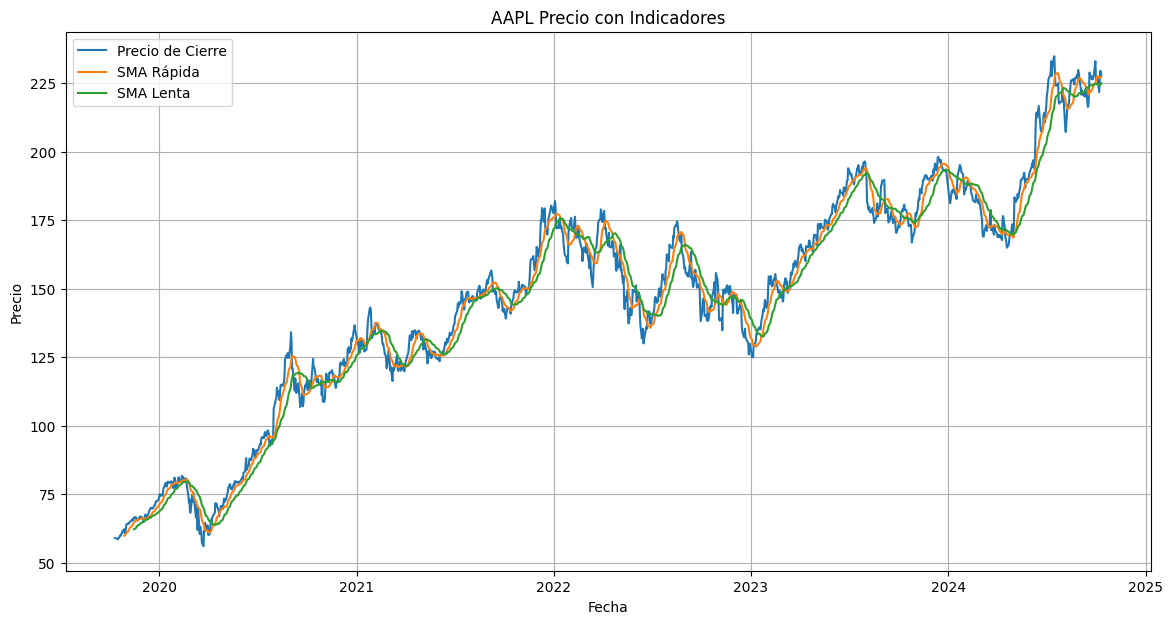

In [3]:
# Especifica el ticker y el intervalo
ticker = 'AAPL'  # Reemplaza 'AAPL' por el ticker que desees
interval = '1d'  # Intervalo utilizado durante la descarga de datos ('1d', '1wk', '1mo')

# Llamar a la función de visualización
visualize_ticker(ticker, interval=interval)
